In [12]:
import pandas as pd

In [13]:
sales = pd.read_csv('../Downloads/attachment_sales-cars.csv')

In [14]:
from pandas import datetime
def parser(x):
    return datetime.strptime(x,'%Y-%m')
sales = pd.read_csv('../Downloads/attachment_sales-cars.csv', parse_dates=[0],index_col=0, date_parser = parser)

In [15]:
sales.head()

,Date
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [16]:
sales.Date[1]

146

In [17]:
sales.columns = ['Sales']

In [18]:
sales.shape

(36, 1)

In [19]:
x = 0
for date in sales['Month']:
    x = x+1
print(x)

KeyError: 'Month'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(sales)

## Stationary

The given series is not stationary

### Converting series to stationary

In [20]:
sales_diff = sales.diff(periods=1)
sales_diff = sales_diff[1:]

In [21]:
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


In [22]:
plt.plot(sales_diff)

NameError: name 'plt' is not defined

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales_diff)

<Figure size 640x480 with 1 Axes>

In [35]:
# from sklearn.model_selection import train_test_split
# X_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [34]:
X = sales.values
train = X[0:27]
test = X[26:]
predictions = []
print(X,test.shape)

[[266]
 [146]
 [183]
 [119]
 [180]
 [169]
 [232]
 [225]
 [193]
 [123]
 [337]
 [186]
 [194]
 [150]
 [210]
 [273]
 [191]
 [287]
 [226]
 [304]
 [290]
 [422]
 [265]
 [342]
 [340]
 [440]
 [316]
 [439]
 [401]
 [390]
 [490]
 [408]
 [490]
 [420]
 [520]
 [480]] (10, 1)


In [26]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [100]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [101]:
predictions = model_ar_fit.predict(start=27, end=36)

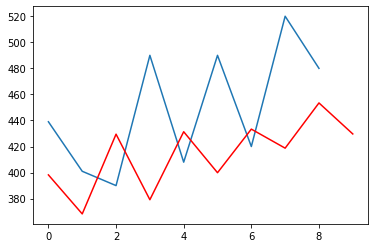

In [102]:
plt.plot(test)
plt.plot(predictions, color = 'red')

# ARIMA MODEL

In [148]:
from statsmodels.tsa.arima_model import ARIMA

In [193]:
model_arima = ARIMA(train,order = (0,2,1))

In [194]:
model_arima_fit = model_arima.fit()

In [195]:
predictions = model_arima_fit.forecast(steps = 9)[0]

In [196]:
print(model_arima_fit.aic)

306.10194741083694


In [29]:
predictions

[]

In [30]:
print(test)

[[316]
 [439]
 [401]
 [390]
 [490]
 [408]
 [490]
 [420]
 [520]
 [480]]


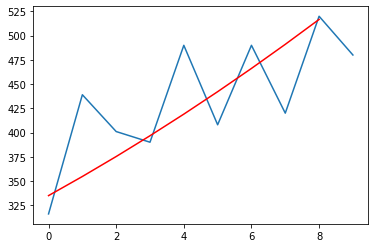

In [198]:
plt.plot(test)
plt.plot(predictions, color = 'red')

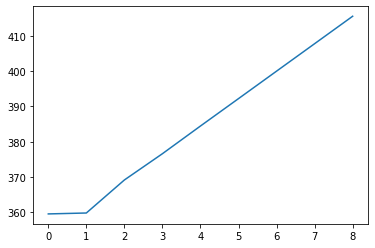

In [214]:
def pdq():
    p=0
    d=0
    q=0
    min_value_aic = float("inf")
    for i in range(0,5):
        for j in range(0,5):
            for k in range(0,5):
                try:
                    model_arima = ARIMA(train,order = (i,j,k))
                    model_arima_fit = model_arima.fit()
                    aic = model_arima_fit.aic
                    if aic<min_value_aic:
                        min_value_aic = aic
                        p=i
                        d=j
                        q=k
                except:
                    continue
    return [p,d,q]
                

In [215]:
pdq1 = pdq()
print(pdq1)
model_arima = ARIMA(train,order = (pdq1[0], pdq1[1], pdq1[2]))
model_arima_fit = model_arima.fit()
aic = model_arima_fit.aic

/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/skdie/anaconda3/envs/datamites/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverti

[4, 2, 1]


In [216]:
print(aic)

291.39913447173694


In [217]:
predictions = model_arima_fit.forecast(steps = 9)[0]

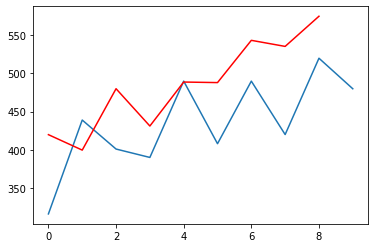

In [218]:
plt.plot(test)
plt.plot(predictions, color = 'red')

In [27]:
27/36

0.75